<a href="https://colab.research.google.com/github/tomonari-masada/courses/blob/master/SML2020/PCA_example_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

出典: 
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html


### 1) 準備。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

### 2) irisデータセットを読み込む。

In [2]:
iris = datasets.load_iris()

### 3) もとは4次元のirisデータの次元を主成分分析で３次元に落とす。

In [3]:
X = iris.data
y = iris.target

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

### 4) 次元削減後のデータ集合をプロットする。

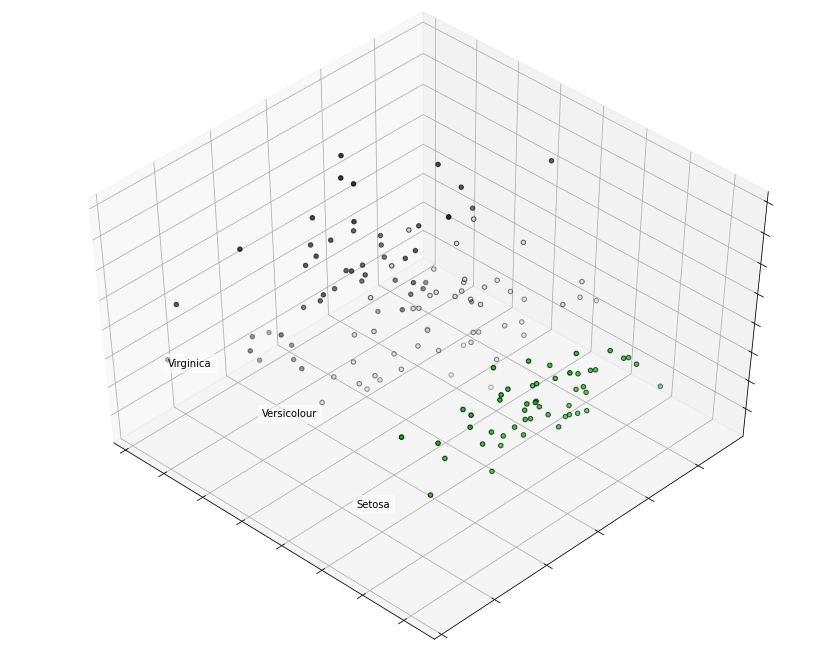

In [4]:
fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()